In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import glob
import h5py
import re
from scipy import stats
from scipy.stats import norm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
directory = '//allen/programs/braintv/workgroups/nc-ophys/visual_behavior/platform_paper_plots/figure_4/all_cre_clustering_090923_select_k/'

# Regular expression to match the desired file names
pattern = r'cluster_meta_n_(\d+)_clusters\.h5'

# Function to extract the number from the file name
def extract_number(filename):
    match = re.search(pattern, filename)
    if match:
        return int(match.group(1))
    return -1

# Get a list of all files in the directory
all_files = os.listdir(directory)

In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [5]:
filename = 'cluster_meta_n_14_clusters.h5'

In [6]:
file_path = os.path.join(directory, filename)
cluster_df = pd.read_hdf(file_path, key='df')

In [7]:
%%time
import visual_behavior.ophys.response_analysis.cell_metrics as cm 

data_type = 'filtered_events'
condition = 'images' #changes or omissions
session_subset = 'full_session' #engaged
inclusion_criteria = 'platform_experiment_table'
    
stimuli = 'all_images'
response_metrics = cm.get_cell_metrics_for_conditions(data_type, condition, stimuli, session_subset, inclusion_criteria)
stimuli = 'pref_image'
response_metrics_pref = cm.get_cell_metrics_for_conditions(data_type, condition, stimuli, session_subset, inclusion_criteria)

removing 1 problematic experiments
there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table


100%|████████████████████████████████████████████████████████████████████████████████| 402/402 [00:30<00:00, 13.09it/s]


there are 402 experiments in the returned cell_metrics table
removing 1 problematic experiments
removing 1 problematic experiments
there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table


100%|████████████████████████████████████████████████████████████████████████████████| 402/402 [00:31<00:00, 12.96it/s]


there are 402 experiments in the returned cell_metrics table
removing 1 problematic experiments
Wall time: 1min 33s


In [ ]:
# omissions and changes
data_type = 'filtered_events'
condition = 'omissions' #changes or omissions
session_subset = 'full_session' #engaged
inclusion_criteria = 'platform_experiment_table'  
stimuli = 'all_images'

response_metrics_omissions = cm.get_cell_metrics_for_conditions(data_type, condition, stimuli, session_subset, inclusion_criteria)
condition = 'changes' #changes or omissions
response_metrics_changes = cm.get_cell_metrics_for_conditions(data_type, condition, stimuli, session_subset, inclusion_criteria)

removing 1 problematic experiments
there are 402 experiments after filtering for inclusion criteria -  platform_experiment_table


 23%|██████████████████▌                                                              | 92/402 [00:06<00:20, 14.93it/s]

In [9]:
base_dir = r'\\allen\programs\braintv\workgroups\nc-ophys\visual_behavior\platform_paper_plots\figure_4'

save_dir = os.path.join(base_dir, 'all_cre_clustering_082823_n_14')
n_clusters = 14 # arbitrary choice that happens to pull out similar clusters to within cre clustering

cluster_meta_save_path = os.path.join(save_dir, 'cluster_meta_n_'+str(n_clusters)+'_clusters.h5')

# if clustering output exists, load it
if os.path.exists(cluster_meta_save_path):
    cluster_meta = pd.read_hdf(cluster_meta_save_path, key='df')


filename = '24_events_all_L2_optimize_by_session_feature_matrix.h5'
feature_matrix = pd.read_hdf(os.path.join(save_dir, filename), key='df')
   

In [10]:
## get pivoted results
import visual_behavior_glm.GLM_fit_dev as gfd
import visual_behavior_glm.GLM_analysis_tools as gat
import visual_behavior_glm.GLM_across_session as gas
import visual_behavior.data_access.utilities as utilities
import visual_behavior.data_access.loading as loading


In [26]:
glm_version = '24_events_all_L2_optimize_by_session'

# get across session normalized dropout scores
df, failed_cells = gas.load_cells(glm_version, clean_df=True)
df = df.set_index('identifier')

Loading list of matched cells
removing 1 problematic experiments
Loading across session normalized dropout scores


100%|██████████████████████████████████████████████████████████████████████████████| 3921/3921 [01:19<00:00, 49.46it/s]


0 cells could not be loaded


In [27]:
# # only use across session values
# across = df[[key for key in df.keys() if '_across' in key] + ['cell_specimen_id', 'ophys_experiment_id', 'experience_level']]
# results_pivoted = across.copy()
# # rename across session columns 
# results_pivoted = results_pivoted.rename(
#     columns={'omissions_across': 'omissions', 'all-images_across': 'all-images',
#              'behavioral_across': 'behavioral', 'task_across': 'task'})
# print(len(results_pivoted), 'len(results_pivoted)')


# only use across session values
across = df[[key for key in df.keys() if '_across' in key] + ['cell_specimen_id', 'ophys_experiment_id', 'experience_level']]
results_pivoted = across.copy()
# rename across session columns 
results_pivoted = results_pivoted.rename(
    columns={'omissions_across': 'omissions', 'all-images_across': 'all-images',
             'behavioral_across': 'behavioral', 'task_across': 'task'})
print(len(results_pivoted), 'len(results_pivoted)')


11763 len(results_pivoted)
11763 len(results_pivoted)


In [29]:
results_pivoted

,omissions,all-images,behavioral,task,cell_specimen_id,ophys_experiment_id,experience_level
identifier,,,,,,,
794381992_1086551315,0.000000,0.000000,0.000000,0.000000,1086551315,794381992,Familiar
795076128_1086551315,0.000000,-0.295018,0.000000,-0.094833,1086551315,795076128,Novel 1
796105304_1086551315,0.000000,-0.258126,0.000000,-0.430496,1086551315,796105304,Novel >1
794381992_1086550804,0.000000,0.000000,0.000000,0.000000,1086550804,794381992,Familiar
795076128_1086550804,0.000000,0.000000,0.000000,0.000000,1086550804,795076128,Novel 1
...,...,...,...,...,...,...,...
1086910729_1120111711,0.000000,0.000000,0.000000,0.000000,1120111711,1086910729,Novel 1
1087825608_1120111711,0.000000,0.000000,0.000000,0.000000,1120111711,1087825608,Novel >1
1086707480_1120111106,0.000000,-0.609220,-0.357211,-0.056941,1120111106,1086707480,Familiar


In [30]:
# load experiments table
experiments_table = loading.get_platform_paper_experiment_table(limit_to_closest_active=True)
# limit to closest familiar and novel active
experiments_table = utilities.limit_to_last_familiar_second_novel_active(experiments_table)
experiments_table = utilities.limit_to_containers_with_all_experience_levels(experiments_table)

cells_table = loading.get_cell_table()
# load matched cells table
cells_table = loading.get_matched_cells_table(cells_table)
matched_cells = cells_table.cell_specimen_id.unique()
matched_experiments = cells_table.ophys_experiment_id.unique()

# get cre_lines and cell types for plot labels
cre_lines = np.sort(cells_table.cre_line.unique())
cell_types = utilities.get_cell_types_dict(cre_lines, experiments_table)

removing 1 problematic experiments
removing 1 problematic experiments
3921 cells in matched cells table


##### keep results_pivoted for matched cells only

In [31]:
# limit to matched cells 
results_pivoted = results_pivoted[results_pivoted.ophys_experiment_id.isin(matched_experiments)]
results_pivoted = results_pivoted[results_pivoted.cell_specimen_id.isin(matched_cells)]

# drop duplicates
results_pivoted = results_pivoted.drop_duplicates(subset=['cell_specimen_id', 'experience_level'])
print(len(results_pivoted), 'len(results_pivoted) after dropping duplicates')
        
print(len(results_pivoted.cell_specimen_id.unique()),
      'cells in results_pivoted after limiting to strictly matched cells')

11763 len(results_pivoted) after dropping duplicates
3921 cells in results_pivoted after limiting to strictly matched cells


In [32]:
from visual_behavior.dimensionality_reduction.clustering import plotting
from visual_behavior.dimensionality_reduction.clustering import processing

# limit to features used for clustering
features = processing.get_features_for_clustering()
features = [*features, 'ophys_experiment_id']
results_pivoted = processing.limit_results_pivoted_to_features_for_clustering(results_pivoted, features)

# flip sign so coding scores are positive
results_pivoted = processing.flip_sign_of_dropouts(results_pivoted, processing.get_features_for_clustering(), use_signed_weights=False)

# now drop ophys_experiment_id
results_pivoted = results_pivoted.drop(columns=['ophys_experiment_id'])

#### keep response metrics for matched cells only

In [33]:


response_metrics_sel = response_metrics[response_metrics.ophys_experiment_id.isin(matched_experiments)]
response_metrics_sel = response_metrics_sel [response_metrics_sel .cell_specimen_id.isin(matched_cells)]

response_metrics_pref_sel = response_metrics_pref[response_metrics_pref.ophys_experiment_id.isin(matched_experiments)]
response_metrics_pref_sel = response_metrics_pref_sel[response_metrics_pref_sel .cell_specimen_id.isin(matched_cells)]

response_metrics_omissions_sel = response_metrics_omissions[response_metrics_omissions.ophys_experiment_id.isin(matched_experiments)]
response_metrics_omissions_sel = response_metrics_omissions_sel[response_metrics_omissions_sel .cell_specimen_id.isin(matched_cells)]

response_metrics_changes_sel = response_metrics_changes[response_metrics_changes.ophys_experiment_id.isin(matched_experiments)]
response_metrics_changes_sel = response_metrics_changes_sel[response_metrics_changes_sel .cell_specimen_id.isin(matched_cells)]

NameError: name 'response_metrics_changes' is not defined

##### get cluster metrics

In [ ]:
# for each cre
cluster_meta_save_path = os.path.join(save_dir, 'cluster_meta_n_'+str(n_clusters)+'_clusters.h5')

# if clustering output exists, load it
if os.path.exists(cluster_meta_save_path):
    cluster_meta = pd.read_hdf(cluster_meta_save_path, key='df')
    # merge in cell metadata
    cell_metadata = processing.get_cell_metadata_for_feature_matrix(feature_matrix, cells_table)
    cell_metadata = cell_metadata.drop(columns=['ophys_experiment_id', 'cre_line'])
    cluster_meta = cluster_meta.merge(cell_metadata.reset_index(), on='cell_specimen_id')
    cluster_meta = cluster_meta.set_index('cell_specimen_id')


In [ ]:
cluster_metrics = processing.get_cluster_metrics(cluster_meta, feature_matrix, results_pivoted)
cluster_metrics.keys()

### Plot cell metrics across clusters

In [655]:
rm_features = ['lifetime_sparseness', 'fano_factor', 'reliability', 'running_modulation_index', 'mean_response',
               'image_selectivity_index_one_vs_all', 'image_selectivity_index', ]
# rm_features =  ['fano_factor', 'reliability', 'running_modulation_index', 'mean_response',]
# all images
rm_sel_all = response_metrics_sel[['cell_specimen_id', 'experience_level', *rm_features]]
rm_unstacked_all = rm_sel_all.groupby(['cell_specimen_id', 'experience_level']).mean().unstack()

# preferred image only
rm_sel_pref = response_metrics_pref_sel[['cell_specimen_id', 'experience_level', *rm_features]]
rm_unstacked_pref = rm_sel_pref.groupby(['cell_specimen_id', 'experience_level']).mean().unstack()


rm_features_omissions = [ 'fano_factor', 'reliability', 'running_modulation_index', 'mean_response',
                         'omission_modulation_index', 'fraction_significant_p_value_gray_screen']
# omissions
rm_sel_omissions = response_metrics_omissions_sel[['cell_specimen_id', 'experience_level', *rm_features_omissions]]
rm_unstacked_omissions = rm_sel_omissions.groupby(['cell_specimen_id', 'experience_level']).mean().unstack()


rm_features_changes = ['lifetime_sparseness', 'fano_factor', 'reliability', 'running_modulation_index', 'mean_response',
                         'fraction_significant_p_value_gray_screen', 'change_response']
# changes
rm_sel_changes = response_metrics_changes_sel[['cell_specimen_id', 'experience_level', *rm_features]]
rm_unstacked_changes = rm_sel_changes.groupby(['cell_specimen_id', 'experience_level']).mean().unstack()





#### Plot distributions with statistics

In [656]:
def add_significance(sample1, sample2, test='2ttest'):

    if len(sample1)!=0 and len(sample2)!=0:
        nan_mask = np.isnan(sample1)
        # Remove NaN values from the array
        sample1_without_nans = sample1[~nan_mask]
    
    
        nan_mask = np.isnan(sample2)
        # Remove NaN values from the array
        sample2_without_nans = sample2[~nan_mask]

        if test == '2ttest':

            # Perform two-sample t-test (parametric)
            t, p = stats.ttest_ind(sample1_without_nans, sample2_without_nans)

        elif test == 'MW':

            # Perform Mann-Whitney U test (non-parametric)
            t, p = stats.mannwhitneyu(sample1_without_nans, sample2_without_nans)

        elif test == 'W':
            from scipy.stats import wilcoxon
            try:            
                diff = np.squeeze(sample1)- np.squeeze(sample2)
                res = wilcoxon(diff)# diff)
                t = res.statistic
                p = res.pvalue
            except:
                t=np.nan
                p=np.nan
        else:
            print('Test was not recognized')
            t=np.nan
            p=np.nan
    else:
        print('One or two samples do no have data')
        t=np.nan
        p=np.nan
        
    return t,p
    

In [657]:
cre_lines = np.sort(cells_table.cre_line.unique())

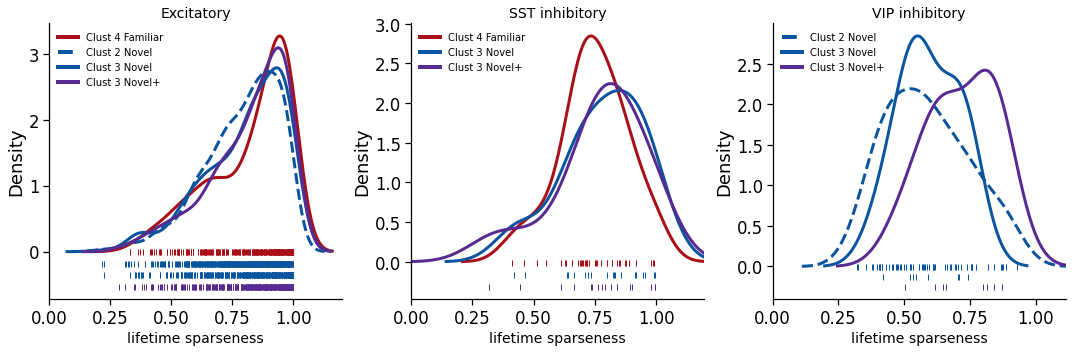

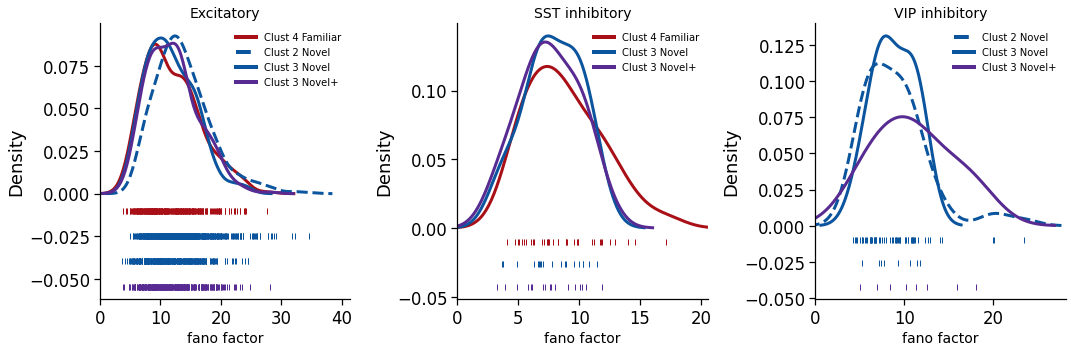

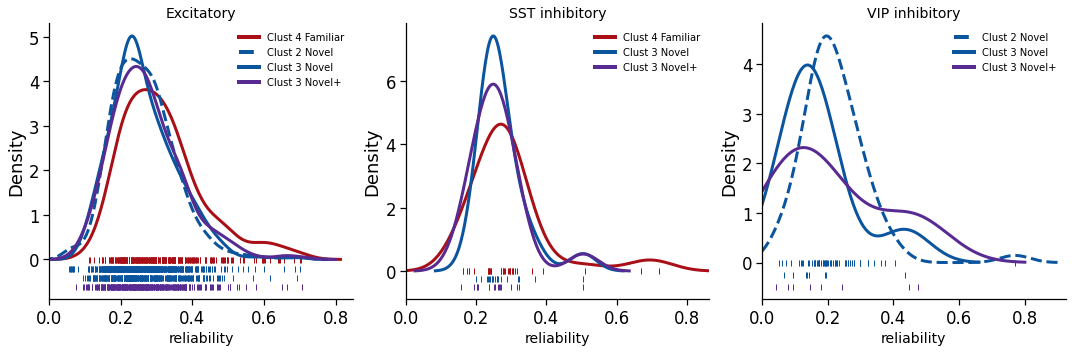

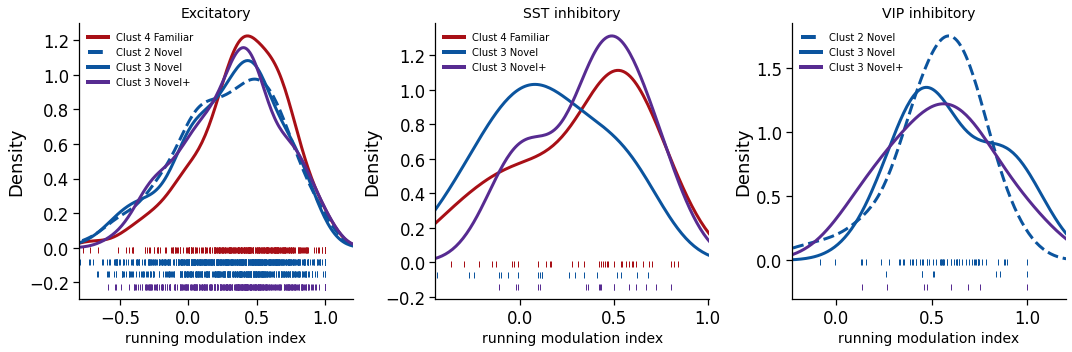

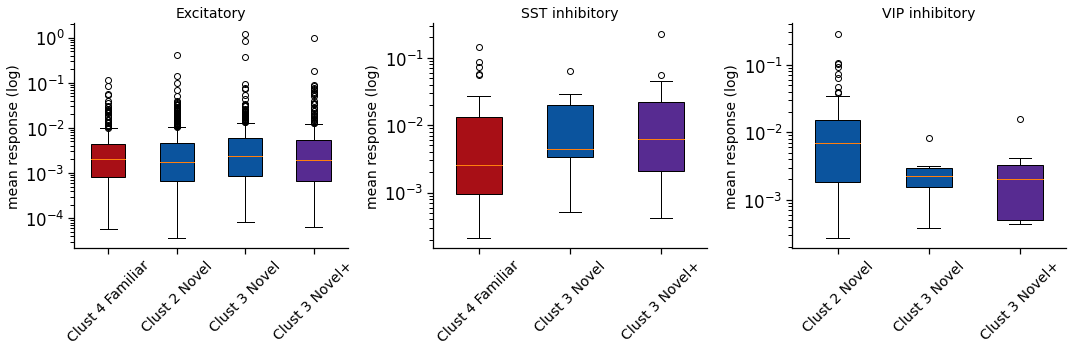

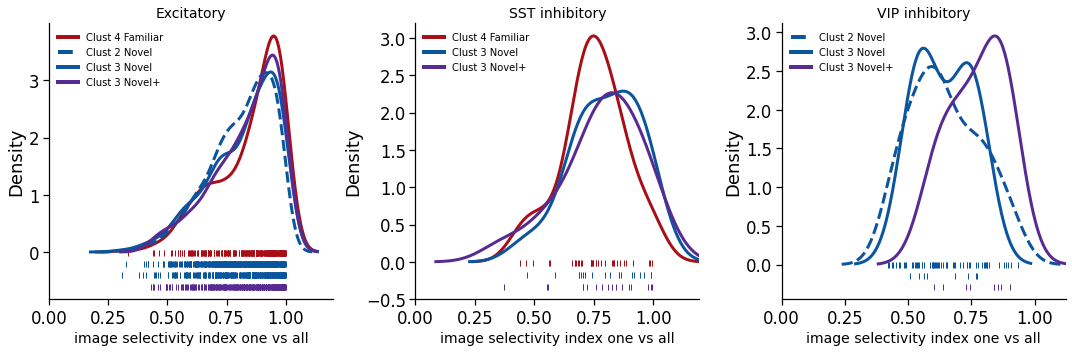

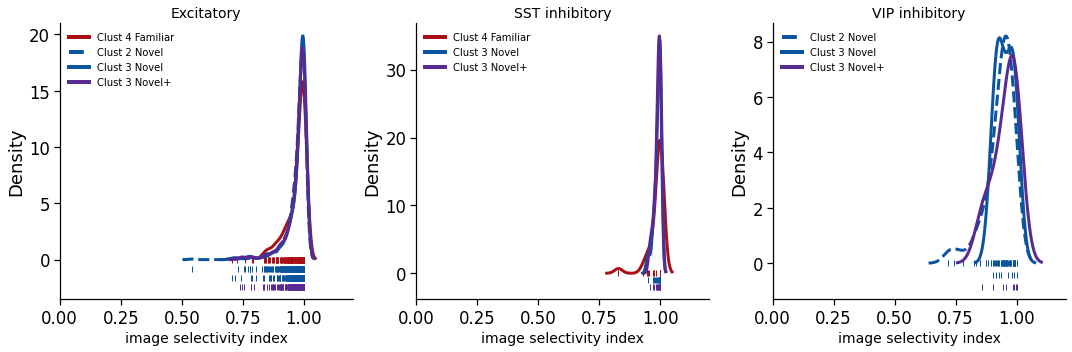

In [658]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from itertools import combinations
import pickle
from visual_behavior.dimensionality_reduction.clustering import plotting
from visual_behavior.dimensionality_reduction.clustering import processing

# Function to prepare data based on cluster_id, exp_level, and cre_line
def prepare_data(cluster_id, exp_level, cre_line, rm_f):
    tmp = cluster_df[(cluster_df.cluster_id == cluster_id) & (cluster_df.cre_line == cre_line)]
    cids = tmp.cell_specimen_id.values
    return df.loc[cids][[rm_f]][[(rm_f, exp_level)]].values

# Function to plot kernel density estimate and rug plot
def plot_kde_rugplot(ax, data, color, y_shift, linestyle='-'):
    ax = sns.kdeplot(np.squeeze(data), color=color, linewidth=3, linestyle=linestyle, ax=ax)
    ax.plot(data, [y_shift]*len(data), '|', color=color)
    ax.set_yscale('linear')
    return ax

def plot_response_boxplot(ax, data, colors, patch_artist=True, widths = 0.5):

    if ax is None:
        fig, ax = plt.subplots(1,1)
    
    data_without_nans = []
    for d in data:
        if len(d)!=0:
            nan_mask = np.isnan(d)
            # Remove NaN values from the array
            data_without_nans.append(d[~nan_mask])
   
    bplot = ax.boxplot(np.squeeze(data_without_nans).T, patch_artist=patch_artist, widths=widths)
    
    # change color
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_yscale('log')
    plt.tight_layout()
    return ax

# Function to plot cluster rug plots
def plot_cluster_rugplots(ax, cre_line, cluster_ids, exp_levels, rm_f, linestyles=None, test='MW'):
    custom_lines = []
    labels = []
    all_data = []
    all_colors = []
    colors = gvt.project_colors()
    y_shift_base = -0.01
    x_shift = 0
    xmin, xmax = [0, 0]
    start = True
    fontsize = 14
    data_dict = {}  # Collect data for stats
    pattern = re.compile(r'response')
    
    for cluster_id, exp_level, linestyle in zip(cluster_ids, exp_levels, linestyles):
        data = prepare_data(cluster_id, exp_level, cre_line, rm_f)
        
        if len(data) > 1:
            
            match = pattern.search(rm_f)
            if match:
                all_data.append(data)
                all_colors.append(colors[exp_level])
            else:
                ax = plot_kde_rugplot(ax, data, colors[exp_level], y_shift_base, linestyle)
            if start:
                y_shift = ax.get_ylim()[0]
                start = False
            y_shift_base += y_shift  # Adjust the shift for the next level
            
            # Set x-axis limits based on data
            if not match:
                xmin = min(min(data), xmin)
                xmax = max(max(data), xmax)
                ax.set_xlim([xmin, xmax * 1.2])
                
            
            # Legend
            custom_lines.append(Line2D([0], [0], color=colors[exp_level], linestyle=linestyle, lw=4))
            labels.append(f'Clust {cluster_id+1} {processing.get_experience_map(exp_level)}')
            
            # Collect data for stats
            group_name = f'clust {cluster_id} {processing.get_experience_map(exp_level)}'
            data_dict[group_name] = np.squeeze(data)
    
    if match:
        ax = plot_response_boxplot(ax, all_data, all_colors, patch_artist=True, widths = 0.5)
        ax.set_ylabel(rm_f.replace('_', ' ')+' (log)', fontsize = fontsize)
        ax.set_xticklabels(labels, fontsize=fontsize, rotation=45)
        ax.set_xlabel('')
    else:
        ax.legend(custom_lines, labels, fontsize=10, frameon=False)
        ax.set_xlabel(rm_f.replace('_', ' '), fontsize = fontsize)
        
    ax.set_title(processing.get_cre_line_map(cre_line), fontsize=fontsize)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    return ax, data_dict

# Your original code
df = rm_unstacked_all
suffix = '_pref'
folder = 'cluster_comparisons_pref_image'
description = '_Familiar_vs_Novel_clusters_2_3_4_'
rm_dict = {}

# Loop through rm_features
for index, rm_f in enumerate(rm_features):
    cluster_ids_list = [3, 1, 2, 2]
    exp_levels_list = ['Familiar', 'Novel 1', 'Novel 1', 'Novel >1']
    linestyles = ['-', '--', '-', '-']
    
    fig, ax = plt.subplots(1, len(cre_lines), figsize=(5 * len(cre_lines), 5))
    ax = ax.ravel()

    cre_dict = {}
    for i, cre_line in enumerate(cre_lines):
        ax[i], cre_dict[cre_line] = plot_cluster_rugplots(ax[i], cre_line, cluster_ids_list, exp_levels_list, rm_f, linestyles, test='MW')

    plt.tight_layout()
    plt.show()
    filename = f'{rm_f}_{description}{suffix}.png'
    figname = os.path.join(save_dir,folder , filename) 
    fig.savefig(figname)
  
    rm_dict[rm_f] = cre_dict

    
if suffix == '_all':
    rm_dict_all = rm_dict.copy()
elif suffix == '_pref':
    rm_dict_pref = rm_dict.copy()
elif suffix == '_omissions':
    rm_dict_omissions = rm_dict.copy()
elif suffix == '_changes':
    rm_dict_changes = rm_dict.copy()
    
# Define the filename including the suffix
filename = os.path.join(save_dir, f"rm_dict{suffix}.pkl")
# Pickle the dictionary to a file
with open(filename, 'wb') as file:
    pickle.dump(rm_dict, file)
    file.close()

In [546]:
from itertools import combinations
results_list = []
for rm_f in rm_features:
    for cre in cre_lines:
        data_dict = rm_dict[rm_f][cre]
        keys = list(data_dict.keys())
        for pair in combinations(keys, 2):
            data1 = data_dict[pair[0]]
            data2 = data_dict[pair[1]]
            print(len(data1), len(data2))
            u_stat, p_val = add_significance(data1, data2, test='MW')
            # print(f"Comparing {cre} {pair[0]} vs {pair[1]}:")
            # print(f"  Mann-Whitney U statistic: {u_stat}")
            # print(f"  p-value: {p_val}")

            # Append results to the list
            result = {
                'CRE': cre,
                'Comparison': f"{pair[0]} vs {pair[1]}",
                'U_statistic': u_stat,
                'P_value': p_val,
                'metric': rm_f,
            }
            results_list.append(result)
    print('__________________')
# Convert the results list to a DataFrame
df_results = pd.DataFrame(results_list)
   

313 611
313 377
313 377
611 377
611 377
377 377
43 19
43 19
19 19
62 8
62 8
8 8
__________________
313 611
313 377
313 377
611 377
611 377
377 377
43 19
43 19
19 19
62 8
62 8
8 8
__________________
313 611
313 377
313 377
611 377
611 377
377 377
43 19
43 19
19 19
62 8
62 8
8 8
__________________
313 611
313 377
313 377
611 377
611 377
377 377
43 19
43 19
19 19
62 8
62 8
8 8
__________________
313 611
313 377
313 377
611 377
611 377
377 377
43 19
43 19
19 19
62 8
62 8
8 8
__________________
313 611
313 377
313 377
611 377
611 377
377 377
43 19
43 19
19 19
62 8
62 8
8 8
__________________
313 611
313 377
313 377
611 377
611 377
377 377
43 19
43 19
19 19
62 8
62 8
8 8
__________________


In [547]:
df_results

,CRE,Comparison,U_statistic,P_value,metric
0,Slc17a7-IRES2-Cre,cluster3 Familiar vs cluster1 Novel 1,102020.0,0.000195,lifetime_sparseness
1,Slc17a7-IRES2-Cre,cluster3 Familiar vs cluster2 Novel 1,57805.0,0.066694,lifetime_sparseness
2,Slc17a7-IRES2-Cre,cluster3 Familiar vs cluster2 Novel >1,53773.0,0.461247,lifetime_sparseness
3,Slc17a7-IRES2-Cre,cluster1 Novel 1 vs cluster2 Novel 1,98519.0,0.080359,lifetime_sparseness
4,Slc17a7-IRES2-Cre,cluster1 Novel 1 vs cluster2 Novel >1,90107.0,0.001329,lifetime_sparseness
...,...,...,...,...,...
79,Sst-IRES-Cre,cluster3 Familiar vs cluster2 Novel >1,426.5,0.018746,image_selectivity_index
80,Sst-IRES-Cre,cluster2 Novel 1 vs cluster2 Novel >1,168.0,0.849173,image_selectivity_index
81,Vip-IRES-Cre,cluster1 Novel 1 vs cluster2 Novel 1,207.0,0.543090,image_selectivity_index
82,Vip-IRES-Cre,cluster1 Novel 1 vs cluster2 Novel >1,178.0,0.246883,image_selectivity_index


In [250]:

df = rm_unstacked_all
suffix='_all'
folder = 'distributions_all_images'

for index, rm_f in enumerate(rm_features):
    for cluster_id_1 in range(1,13): #5
        for cluster_id_2 in range(1,13): #9
            for exp_level_1 in experience_levels:
                for exp_level_2 in experience_levels:
                        
                    fig,ax = plt.subplots(1,3, figsize=(15,7), )#sharex=True)
                    ax=ax.ravel()
                    for c,cre in enumerate(cre_lines):
                        
                        # get data from first cluster
                        tmp = cluster_df[(cluster_df.cluster_id==cluster_id_1-1) & (cluster_df.cre_line==cre)]
                        cids = tmp.cell_specimen_id.values
                        try:
                            data = df.loc[cids][[rm_f]][[(rm_f,  exp_level_1)]]
                            data_array1=data.values

                        except:
                            data_array1 =[]
                            print('no cells')
                            
                        # get data from second cluster    
                        tmp = cluster_df[(cluster_df.cluster_id==cluster_id_2-1) & (cluster_df.cre_line==cre)]
                        cids = tmp.cell_specimen_id.values
                        try: 
                            data = df.loc[cids][[rm_f]][[(rm_f,  exp_level_2)]]
                            data_array2=data.values
                        except:
                            data_array2 = []
                            print('no cells')
                            
                        # change to one sample test if comparing cells within the same cluster
                        if cluster_id_1 == cluster_id_2:
                            test='W'
                        else:
                            test='MW'
                                     
                        # plot figure
                        if rm_f == 'mean_response':
                            
                            plot_boxplot(data_array1, data_array2, exp_level_1, exp_level_2, 
                                         ax = ax[c], patch_artist=True, widths = 0.5, test=test, suffix=suffix)
                        else:
                            plot_distribution(data_array1, data_array2, exp_level_1, exp_level_2, 
                                          ax = ax[c], bins=30, density=True, label=False, test=test, suffix=suffix)
                    if exp_level_2 == 'Novel >1':
                        exp_level_2 = 'Novel+'
                    if exp_level_1 == 'Novel >1':
                        exp_level_1 = 'Novel+'
                    plt.suptitle(f'cluster {cluster_id_1} and cluster {cluster_id_2}')
                    plt.tight_layout()
                    # figname
                    filename = f'{rm_f}_{cluster_id_1}_{cluster_id_2}_{exp_level_1}_{exp_level_2}.png'
                    figname = os.path.join(save_dir,folder , filename) 
                    fig.savefig(figname)
                    plt.close('all')


C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


no cells


C:\Users\iryna.yavorska\Anaconda3\envs\vba\lib\site-packages\numpy\lib\histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
no cells
n